<span style="font-size: 20px; font-weight: bold">Click "Cell > Run All" before proceeding.</span>

# Inliner user study

In this experiment, you will be provided two snippets of code using the [Seaborn library](http://seaborn.pydata.org/) to visualize data. You will attempt several tasks involving understanding and modifying the code. **Your goal is to solve the tasks as quickly as possible, by any means necessary.** Your answers will not be judged for cleanliness, quality, etc., just correctness.

A few notes on the parameters of the experiment.

1. You are free to use any resources to solve the problem, including Google and StackOverflow. You may also read and modify the Seaborn library itself -- a copy has been provided in `./seaborn`, and any edits will automatically propagate into this notebook. <br /> <br />

2. The tasks have been specifically designed to not be solvable just through the normal documentation. Again, you may need to edit the library source code.<br /> <br />

5. The answers to the tasks are NOT cumulative. You should start from the original code snippet each time.<br /> <br />

3. Open the [scratchpad notebook](/notebooks/scratchpad.ipynb). You are encouraged to do your work in the scratchpad and then put your final answers in the cells below.<br /> <br />

4. Record your screen during the experiment. On Mac, press Command-Shift-5 and click the "Record Entire Screen" button, then press "Record". On Windows, press Window-G to open the Game Bar and Window-Alt-R to start recording.



## Problem setup

First, we will setup the modules and environment for the task. 

In [2]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from expinfra import *

We will use the sample `tips` dataset containing tipping data from a restaurant. The dataframe is shown below. 

In [33]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Code Snippet #1: Boxplot

The first code snippet is shown below. It generates a boxplot of the `tip` column grouped by the `day` using the [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function.

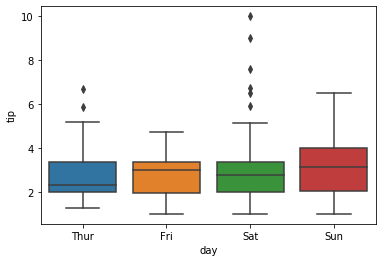

In [34]:
sns.boxplot(x=tips.day, y=tips.tip)

### Example Task: Plot `time` instead of `day` on the x-axis

To warm up with the experiment infrastructure, we will walk through an example task. For each task, you will be given a prompt (above) and a short description. Here, your goal is to change the `x` axis to show `time` from the tips dataset, not `day`.

If the task is to edit the code, the desired output will be provided. Your result must look **identical** to the desired output.

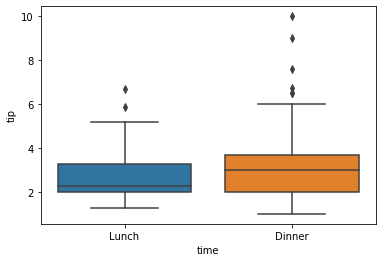

In [71]:
_ = sns.boxplot(x=tips.time, y=tips.tip)

Once you have read the task description, before you start the task, click the "Start &lt;Task Name&gt;" button. Then enter your solution in the cell below. Once you believe you have finished the task, click the "End &lt;Task Name&gt;" button and proceed to the next task.

In [5]:
experiment_start('Example Task')

Button(description='Start Example Task', style=ButtonStyle())

In [6]:
experiment_end('Example Task')

Button(description='End Example Task', style=ButtonStyle())

**Do not forget to click "End task" before moving on!**

### Task 1.1: Change the y-axis label to “Tip amount ($)”

Put your answer in the code cell below. It should generate an inline Matplotlib graph identical to the one below.

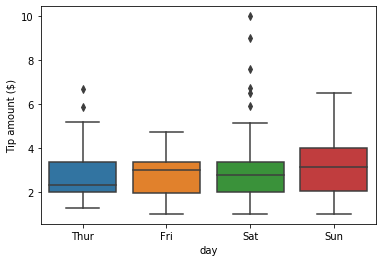

In [72]:
ax = sns.boxplot(x=tips.day, y=tips.tip)
_ = ax.set_ylabel('Tip amount ($)')

In [59]:
experiment_start('Task 1.1')

Button(description='Start Task 1.1', style=ButtonStyle())

In [60]:
experiment_end('Task 1.1')

Button(description='End Task 1.1', style=ButtonStyle())

### Task 1.2: Set width of box lines to half of default thickness

Do not try to eyeball the line thickness--it must be precisely half of the default value used by Seaborn.

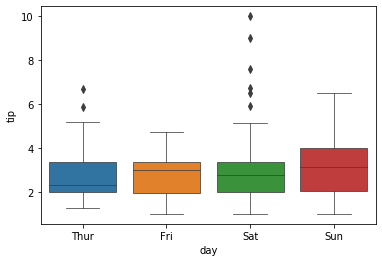

In [73]:
_ = sns.boxplot(x=tips.day, y=tips.tip, linewidth=mpl.rcParams['lines.linewidth']/2)

In [64]:
experiment_start('Task 1.2')

Button(description='Start Task 1.2', style=ButtonStyle())

In [62]:
experiment_end('Task 1.2')

Button(description='End Task 1.2', style=ButtonStyle())

## Task 1.3: Draw outliers as points, not diamonds

Outliers are the marks drawn outside the boxplot range. By default, they are diamonds. They should instead be drawn as points.

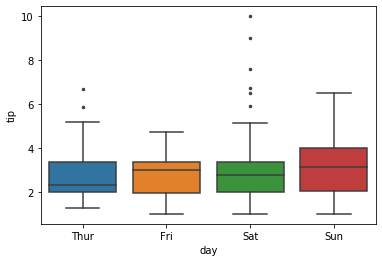

In [75]:
_ = sns.boxplot(x=tips.day, y=tips.tip, flierprops={'marker': '.'})

In [65]:
experiment_start('Task 1.3')

Button(description='Start Task 1.3', style=ButtonStyle())

In [66]:
experiment_end('Task 1.3')

Button(description='End Task 1.3', style=ButtonStyle())

## Code Snippet #2: FacetGrid

The second code snippet is below. It uses Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) API to create a histogram of `tip` for each pair of `sex` and `day`. It works by first creating a facet grid object each row as `sex` and each column as `day`. Then the `g.map(plt.hist, 'tip')` runs the Matplotlib histogram function over the `tip` values of each `sex` and `day` pair.

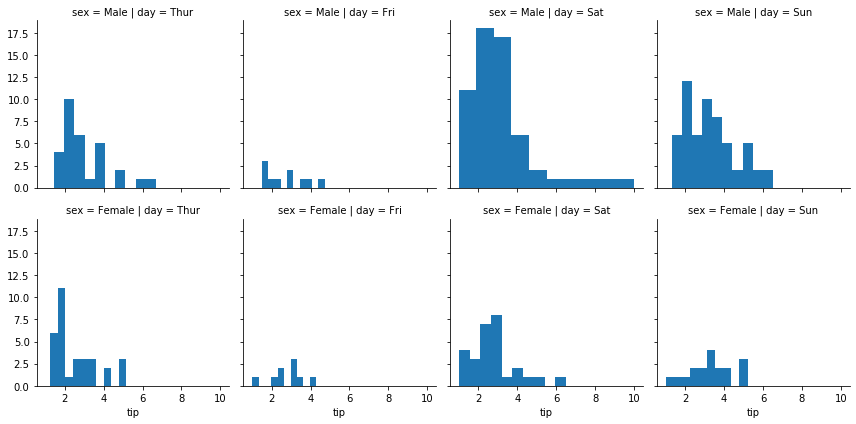

In [51]:
g = sns.FacetGrid(data=tips, row='sex', col='day')
g.map(plt.hist, 'tip')

### Task 2.1:  Change title to look like e.g. sex: "Male", day: "Thur"

The default title styling is "sex = ... | day = ...". Change the formatting as above.


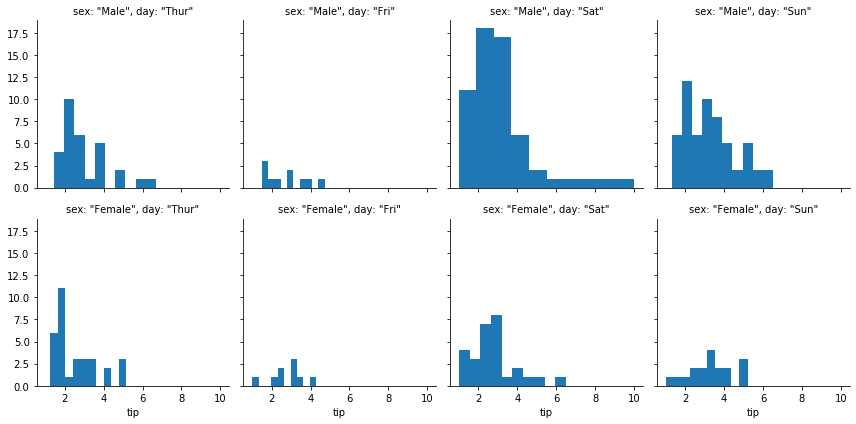

In [70]:
g = sns.FacetGrid(data=tips, row='sex', col='day')
g.map(plt.hist, 'tip')
_ = g.set_titles('{row_var}: "{row_name}", {col_var}: "{col_name}"')

In [25]:
experiment_start('Task 2.1')

Button(description='Start Task 2.1', style=ButtonStyle())

In [26]:
experiment_end('Task 2.1')

Button(description='End Task 2.1', style=ButtonStyle())

### Task 2.2: Draw a red vertical line at the median value in each plot

You may want to use [Axes.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axvline.html).

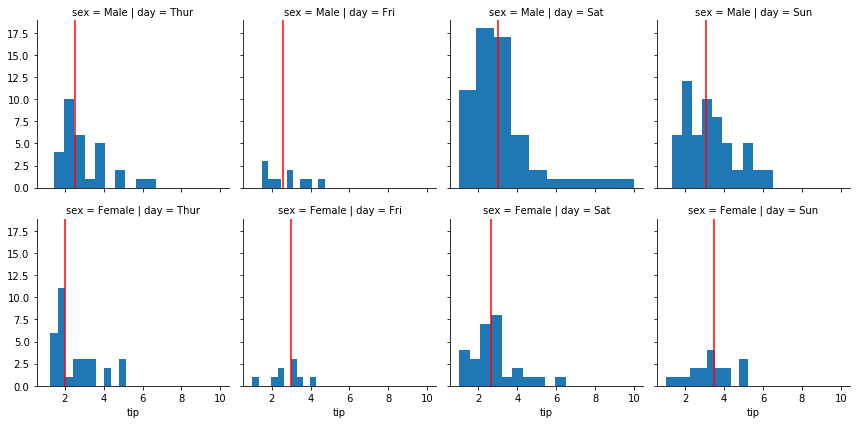

In [67]:
from distutils.version import LooseVersion
from seaborn.palettes import color_palette
import warnings
from itertools import product
import matplotlib.pyplot as plt
from seaborn import utils
import matplotlib as mpl
import numpy as np

# sns.FacetGrid(FacetGrid_ret, data=tips, row='sex', col='day')
OLD_MPL = LooseVersion(mpl.__version__) < LooseVersion('1.4')

# FacetGrid._get_palette(FacetGrid_ret, tips, None, None, None)
palette = color_palette(n_colors=1)
row_names = utils.categorical_order(tips['sex'], None)
col_names = utils.categorical_order(tips['day'], None)
none_na = np.zeros(len(tips), np.bool)
row_na = tips['sex'].isnull()
col_na = tips['day'].isnull()
not_na = ~(row_na | col_na | none_na)
ncol = len(col_names)
nrow = len(row_names)
_n_facets = ncol * nrow
figsize = ncol * 3 * 1, nrow * 3
fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False, sharex
    =True, sharey=True, subplot_kw={}, gridspec_kw={})
_legend_data = {}
fig.tight_layout()

# FacetGrid.despine(FacetGrid_ret)
utils.despine(fig)

# FacetGrid.map(g, plt.hist, 'tip')
kw_color = {}.pop('color', None)
facet_data_ret = []

# FacetGrid.facet_data(g)
row_masks = [(tips['sex'] == n) for n in row_names]
col_masks = [(tips['day'] == n) for n in col_names]
hue_masks = [np.repeat(True, len(tips))]
for (i, row), (j, col), (k, hue) in product(enumerate(row_masks), enumerate
    (col_masks), enumerate(hue_masks)):
    data_ijk = tips[row & col & hue & not_na]
    facet_data_ret.append(((i, j, k), data_ijk))
for (row_i, col_j, hue_k), data_ijk in facet_data_ret:

    # FacetGrid.facet_axis(g, row_i, col_j)
    ax = axes[row_i, col_j]
    plt.sca(ax)

    # FacetGrid._facet_color(g, hue_k, kw_color)
    color = palette[hue_k]
    plot_data = data_ijk[list(['tip'])]
    plot_data = plot_data.dropna()
    plot_args = [v for k, v in plot_data.iteritems()]
    plot_args = [v.values for v in plot_args]

    # FacetGrid._facet_plot(g, plt.hist, ax, plot_args, kwargs)
    plt.hist(plot_args[0])
    ax.axvline(plot_data.median().tip, color='r')

    # FacetGrid._update_legend_data(g, ax)
    handles, labels = ax.get_legend_handles_labels()
    data = {l: h for h, l in zip(handles, labels)}
    _legend_data.update(data)

    # FacetGrid._clean_axis(g, ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend_ = None

# FacetGrid._finalize_grid(g, ['tip'])

# FacetGrid.set_axis_labels(g, 'tip')

# FacetGrid.set_xlabels(g, 'tip')

# FacetGrid._bottom_axes_getter(g)
_bottom_axes = axes[(-1), :].flat
for ax in _bottom_axes:
    ax.set_xlabel('tip')
    
# FacetGrid.set_titles(g)
size = {}.pop('size', mpl.rcParams['axes.labelsize'])
template = ' | '.join(['{row_var} = {row_name}', '{col_var} = {col_name}'])
template = utils.to_utf8(template)
for i, row_name in enumerate(row_names):
    for j, col_name in enumerate(col_names):
        row_name = row_name
        col_name = col_name
        title = template.format(row_var='sex', col_var='day', row_name=
            row_name, col_name=col_name)
        axes[i, j].set_title(title, size=size)
fig.tight_layout()

In [28]:
experiment_start('Task 2.2')

Button(description='Start Task 2.2', style=ButtonStyle())

In [29]:
experiment_end('Task 2.2')

Button(description='End Task 2.2', style=ButtonStyle())

### Task 2.3: Change colors to match boxplot

By default, the FacetGrid plots each histogram the same shade of blue. You need to make each histogram have the same color of the corresponding boxplot in the previous code snippet.

**Be careful that the colors are the exact same!** Check that the boxplot is not darker than the FacetGrid.

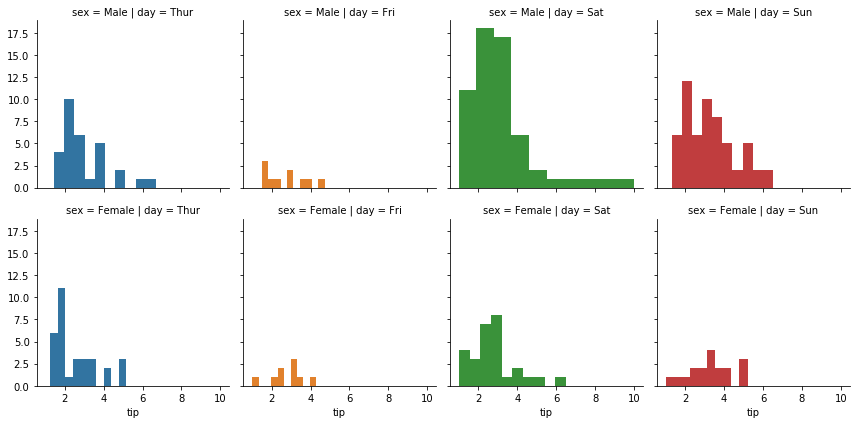

In [68]:
palette = sns.color_palette(n_colors=4, desat=0.75)
g = sns.FacetGrid(data=tips, row='sex', col='day', hue='day', palette=palette)
_ = g.map(plt.hist, 'tip')

In [31]:
experiment_start('Task 2.3')

Button(description='Start Task 2.3', style=ButtonStyle())

In [32]:
experiment_end('Task 2.3')

Button(description='End Task 2.3', style=ButtonStyle())